# Example notebook

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import vstack, QTable
import astropy.units as u
import pickle 
from importlib import reload
import re

# read in the data

In [3]:
# fix up custom units
gvis = u.def_unit('Gvis',namespace=globals())
u.add_enabled_units([gvis])

In [4]:
wsu_all = QTable.read('data/wsu_datarates_mit_per_mous_initial_goal_20250423.ecsv')

In [5]:
wsu_all['weights_all'] = wsu_all['time_tot']/np.sum(wsu_all['time_tot'])

In [6]:
wsu_all.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_later_2x','wsu_nc

In [6]:
len(wsu_all)

5192

In [8]:
wsu_all.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_later_2x','wsu_nc

## Make a plot

Goal is equivalent to MS5. Initial is equivalent to MS1.

In [17]:
np.min(wsu_all['wsu_productsize_initial_stepped2'].to('TB'))

<Quantity 8.96e-06 Tbyte>

In [9]:
np.min(wsu_all['wsu_productsize_goal_stepped2'].to('TB'))

<Quantity 2.0736e-05 Tbyte>

In [18]:
np.max(wsu_all['wsu_productsize_initial_stepped2'].to('TB'))

<Quantity 438.00667677 Tbyte>

In [19]:
np.max(wsu_all['wsu_productsize_goal_stepped2'].to('TB'))

<Quantity 1168.01780471 Tbyte>

In [20]:
# sum is over two cycles
np.sum(wsu_all['wsu_productsize_initial_stepped2'].to('TB')).to('PB')

<Quantity 8.89926388 Pbyte>

In [21]:
#sum is over two cycles
np.sum(wsu_all['wsu_productsize_goal_stepped2'].to('TB')).to('PB')

<Quantity 24.84261091 Pbyte>

Text(0.5, 1.0, '12m+7m data')

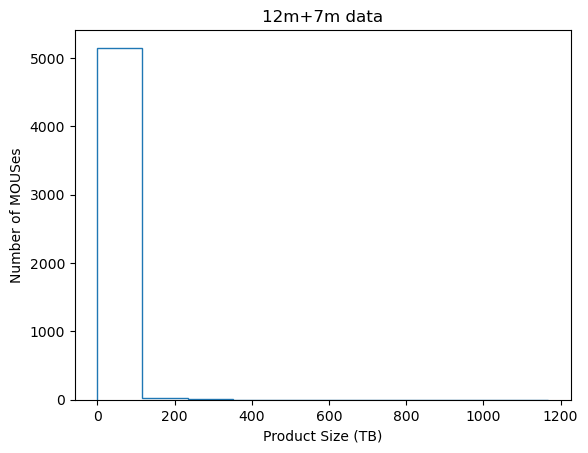

In [12]:
plt.hist(wsu_all['wsu_productsize_goal_stepped2'].to('TB').value,histtype='step',align='mid')
plt.xlabel('Product Size (TB)')
plt.ylabel('Number of MOUSes')
plt.title('12m+7m data')

Text(0.5, 1.0, '12m+7m data')

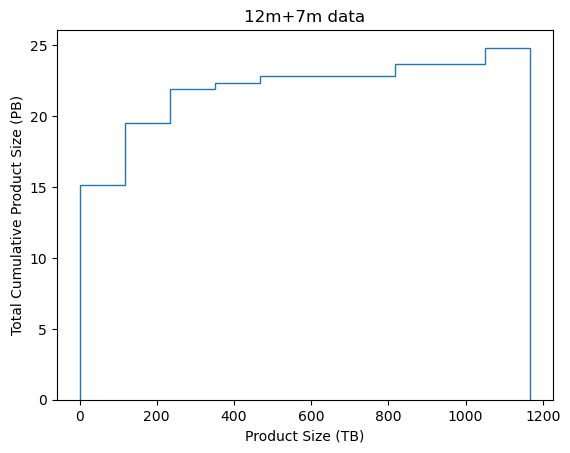

In [13]:
## by setting the weights to the value in PB, we can get the cumulative sum over all the data. 
plt.hist(wsu_all['wsu_productsize_goal_stepped2'].to('TB').value,
        weights=wsu_all['wsu_productsize_goal_stepped2'].to('PB').value, 
        cumulative=True,density=False,histtype='step',align='mid')
plt.xlabel('Product Size (TB)')
plt.ylabel('Total Cumulative Product Size (PB)')
plt.title('12m+7m data')

Text(0.5, 1.0, '7m data only')

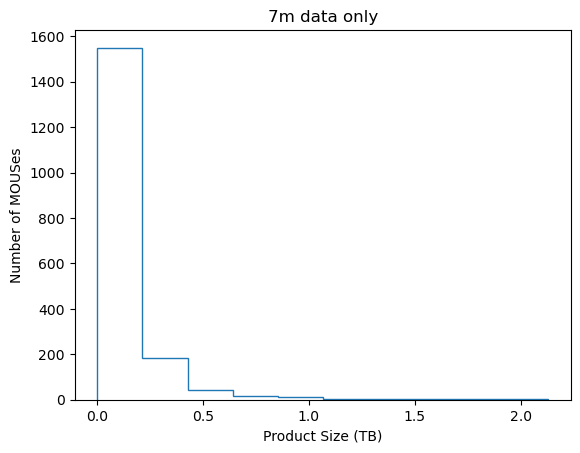

In [14]:
## plotting only 7m data
idx = wsu_all['array'] == '7m'
plt.hist(wsu_all[idx]['wsu_productsize_goal_stepped2'].to('TB').value,histtype='step',align='mid')
plt.xlabel('Product Size (TB)')
plt.ylabel('Number of MOUSes')
plt.title('7m data only')